In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [22]:
data = pd.read_csv('../data/2015.csv')
data.head(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [23]:
data.shape

(158, 12)

In [24]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [26]:
data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

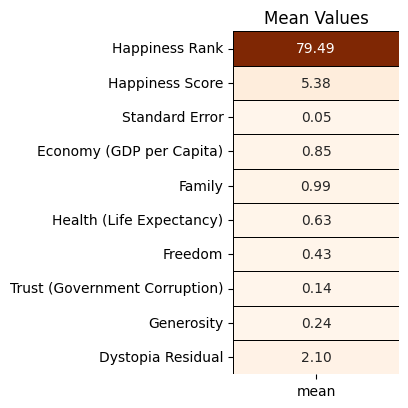

In [27]:
#create a subplot with 1 row, 1 col and figure size (5,5)
fig,ax = plt.subplots(1,1,figsize = (5,5))
colors = ["#DE87ED",'#2D2926']
plt.subplot(1,1,1)
sns.heatmap(data.describe().T[['mean']],cmap = 'Oranges',annot = True,fmt = '.2f',linecolor = 'black',linewidths = 0.4,cbar = False);
plt.title('Mean Values');

fig.tight_layout(pad = 4)

In [28]:
col = list(data.columns)
col.remove('Country')#remove the country value
col.remove('Region') #
categorical_features = ['Country','Region'] #list of categorical features
numerical_features = [*col] # This uses the unpacking operator * to create a new list numerical_features 
        #containing all the elements in col. At this point, col should contain all the columns except for 'Country', 
        # implying these are considered numerical features.
print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : Country Region
Numerical Features : Happiness Rank Happiness Score Standard Error Economy (GDP per Capita) Family Health (Life Expectancy) Freedom Trust (Government Corruption) Generosity Dystopia Residual


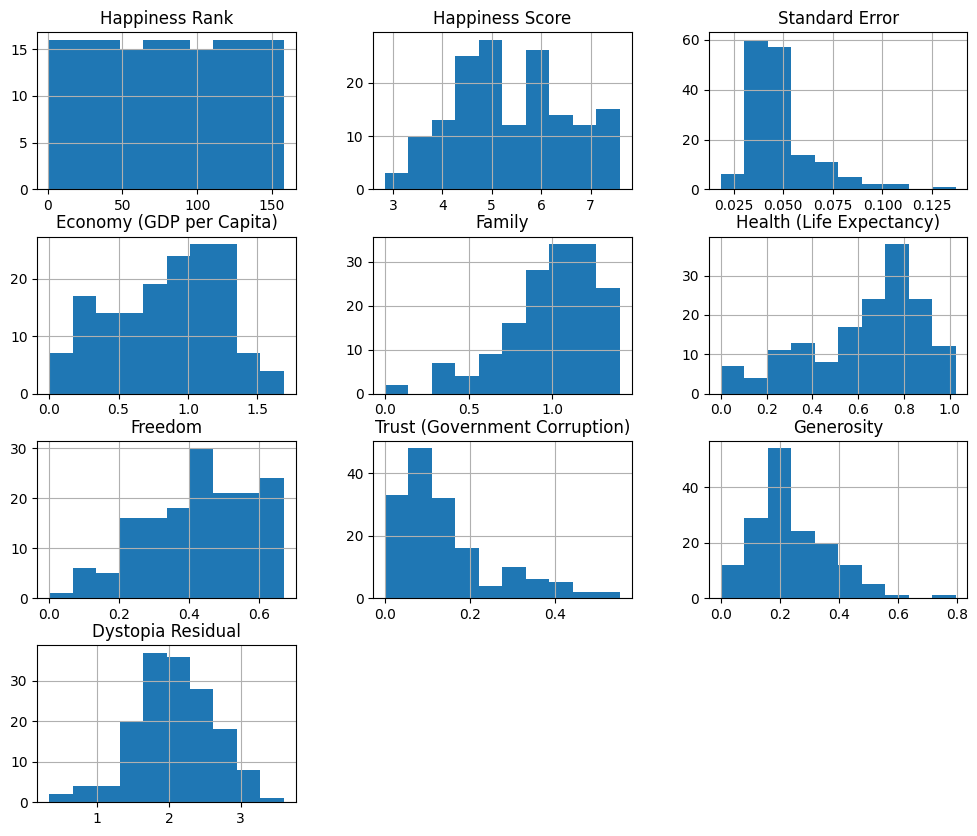

In [ ]:
# Univariate analysis
data[numerical_features].hist(figsize=(12,10))   # quick numeric overview
plt.show()

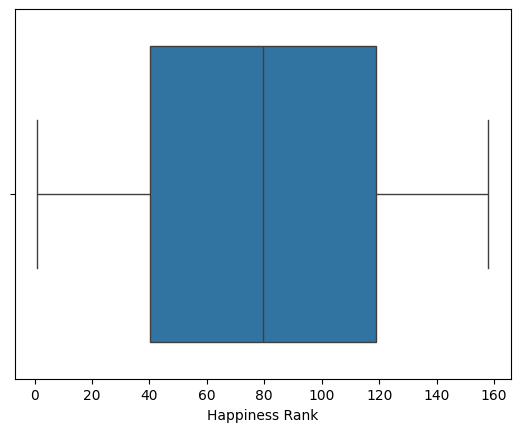

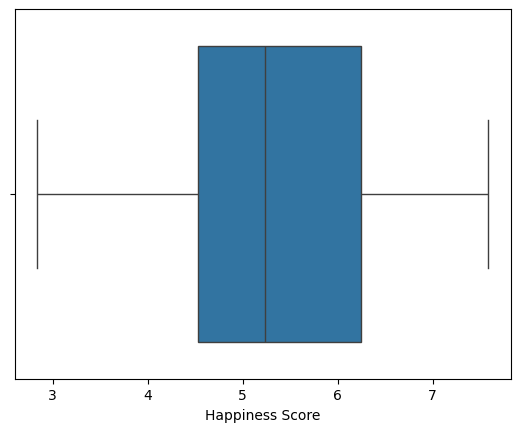

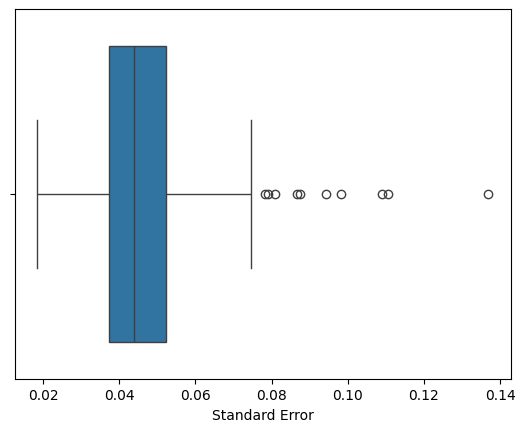

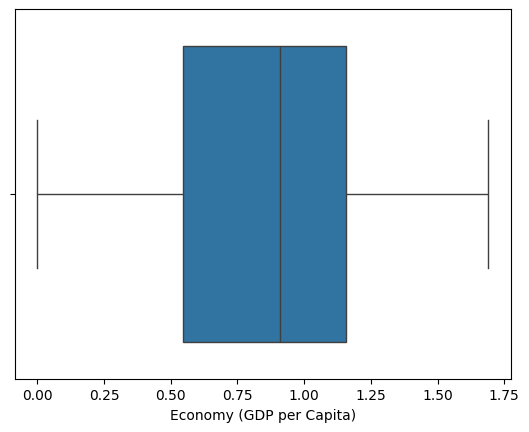

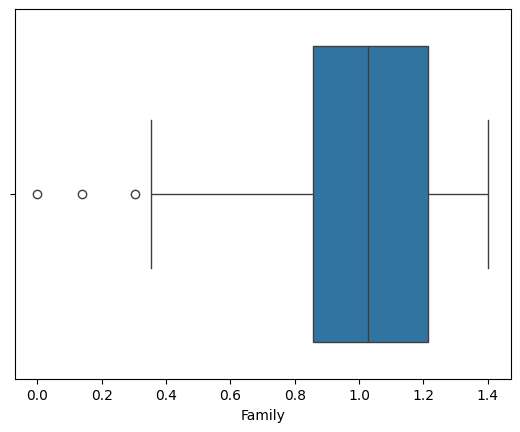

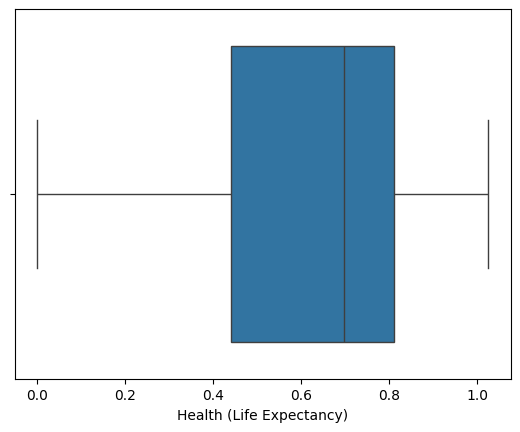

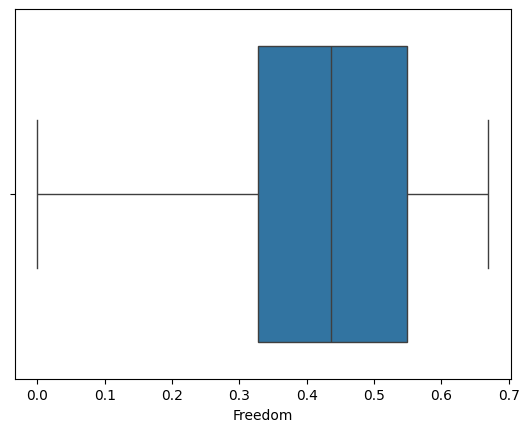

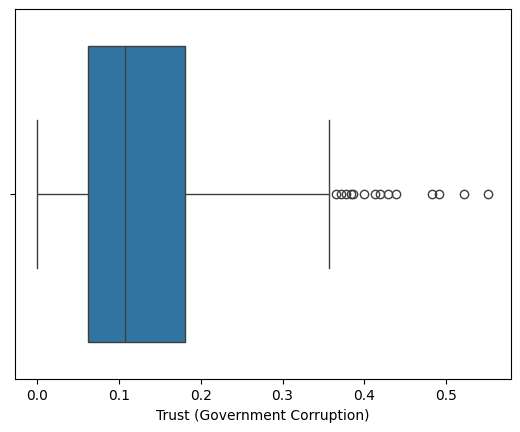

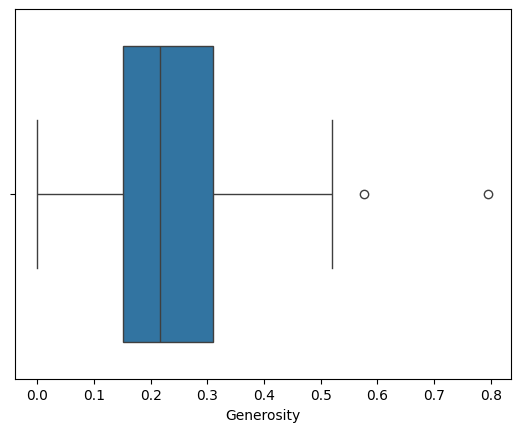

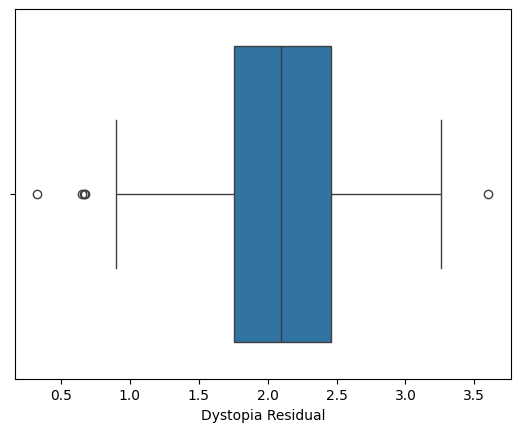

In [30]:
# Boxplots for outliers
for col in numerical_features:
    sns.boxplot(x=data[col])
    plt.show()

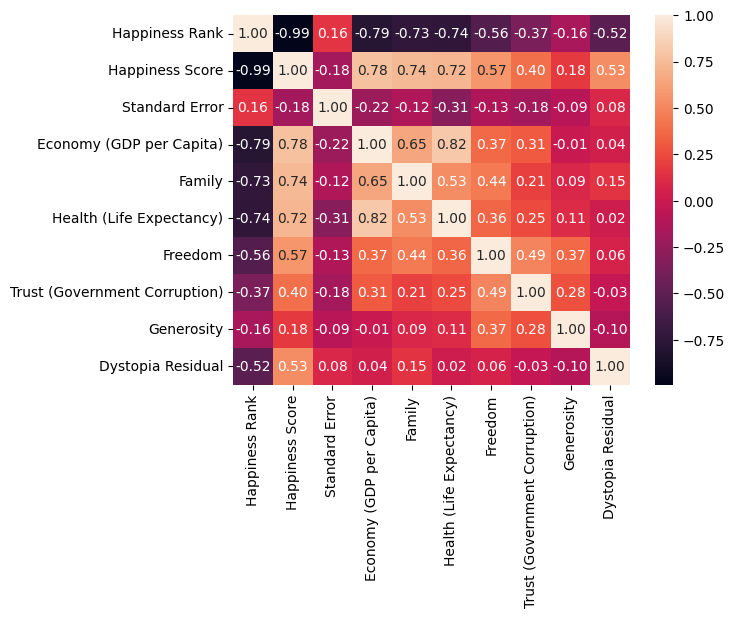

In [31]:
# Correlation heatmap
sns.heatmap(data[numerical_features].corr(), annot=True, fmt=".2f")
plt.show()

In [32]:
numeric_data = data.select_dtypes(include='number')

corr = numeric_data.corr()


Get correlations with Happiness Score only 

In [33]:
# Select only numeric columns
numeric_data = data.select_dtypes(include='number')

# Correlation matrix
corr = numeric_data.corr()

# Correlation with Happiness Score
happiness_corr = corr['Happiness Score'].sort_values(ascending=False)

happiness_corr


Happiness Score                  1.000000
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Dystopia Residual                0.530474
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Standard Error                  -0.177254
Happiness Rank                  -0.992105
Name: Happiness Score, dtype: float64

Top positive correlations (strong drivers of happiness)

In [34]:

numeric_data = data.select_dtypes(include='number')
# Remove self-correlation
top_positive = happiness_corr.drop('Happiness Score').head(5)

top_positive


Economy (GDP per Capita)    0.780966
Family                      0.740605
Health (Life Expectancy)    0.724200
Freedom                     0.568211
Dystopia Residual           0.530474
Name: Happiness Score, dtype: float64

Strongest negative correlations

In [35]:
top_negative = happiness_corr.tail(5)

top_negative


Dystopia Residual                0.530474
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Standard Error                  -0.177254
Happiness Rank                  -0.992105
Name: Happiness Score, dtype: float64

Remove “derived” or misleading features

In [36]:
ignore = ['Happiness Rank', 'Standard Error', 'Dystopia Residual']

filtered_corr = happiness_corr.drop(ignore)

filtered_corr


Happiness Score                  1.000000
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Name: Happiness Score, dtype: float64

Visualize only the meaningful relationships

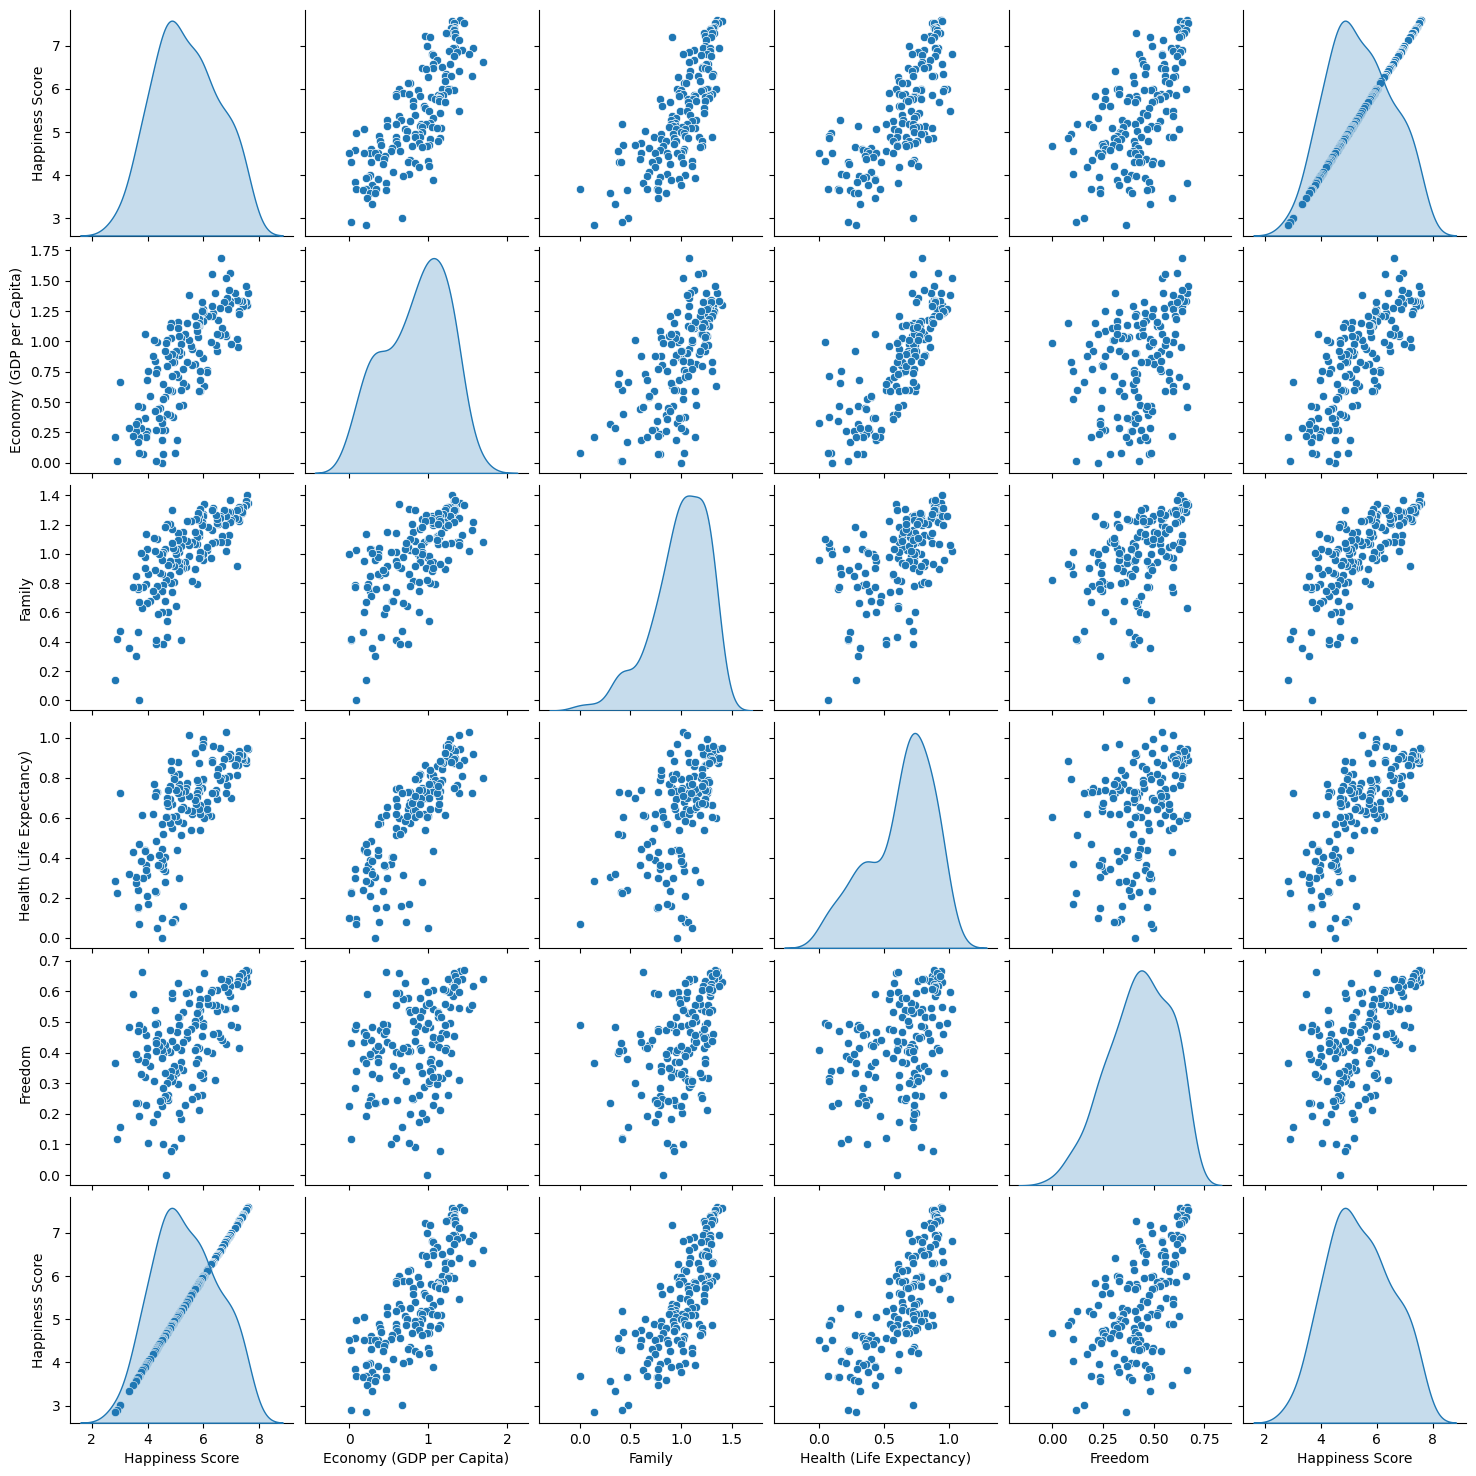

In [37]:
important_features = filtered_corr.head(5).index.tolist()

sns.pairplot(
    data,
    vars=important_features + ['Happiness Score'],
    diag_kind='kde'
)
plt.show()


EDA statement :

*The correlation analysis reveals that GDP per capita, social support (family), and life expectancy show strong positive relationships with happiness score. 

*Freedom also exhibits a moderate positive correlation, while generosity shows only a weak association.

*These results suggest that structural and economic factors play a larger role in determining national happiness than individual altruistic behaviors.

Feature engineering for Clustering:
Drop non-meaningful or derived features

Remove features that:

Are derived from the target

Add statistical noise

Leak information
Why?

Happiness Rank is derived from score

Standard Error is not a country trait

Dystopia Residual is a calculation artifact

In [ ]:
drop_cols = [
    'Happiness Rank',
    'Standard Error',
    'Dystopia Residual'
]

fe_data = data.drop(columns=drop_cols)


In [39]:
fe_data.head(5)

,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [40]:
#keep only numeric data for clustering
fe_data = fe_data.select_dtypes(include='number')


In [41]:
#Handle skewed features (important!)

fe_data['Economy (GDP per Capita)'] = np.log1p(
    fe_data['Economy (GDP per Capita)']
)


In [42]:

from scipy.stats import skew
skewed_feats = fe_data.apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats

Happiness Score                  0.096838
Economy (GDP per Capita)        -0.674399
Family                          -0.997309
Health (Life Expectancy)        -0.698615
Freedom                         -0.409526
Trust (Government Corruption)    1.372275
Generosity                       0.992423
dtype: float64

In [43]:
#Scale features (MANDATORY for clustering)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(fe_data)
fe_data = pd.DataFrame(scaled_data, columns=fe_data.columns)
fe_data.head(5)

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,1.937360,1.219014,1.320281,1.263408,1.577438,2.309652,0.471040
1,1.914581,1.048795,1.514458,1.289434,1.332456,-0.016480,1.575856
2,1.884792,1.091286,1.361054,0.992229,1.469659,2.842774,0.824293
3,1.880411,1.328292,1.251922,1.035145,1.605131,1.852081,0.868638
4,1.797179,1.092764,1.221204,1.118054,1.360416,1.555725,1.748563


In [44]:
#kmeans clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

data['cluster'] = clusters


In [45]:
from sklearn.metrics import silhouette_score

for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    print(k, score)


2 0.3155741037948136
3 0.28928140706793154
4 0.27735214049105034
5 0.24820187046395886
6 0.1979514875742198


Use PCA to:

Visualize clusters

Reduce redundancy

In [47]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
pca_data


array([[ 3.80580682,  0.93378403],
       [ 3.25206101,  0.49375245],
       [ 3.77650384,  1.46801323],
       [ 3.64197275,  1.02410173],
       [ 3.47386672,  1.42703372],
       [ 3.36715567,  0.66861555],
       [ 3.32189045,  1.46892329],
       [ 3.61380326,  1.44802197],
       [ 3.60808623,  1.97062062],
       [ 3.52298621,  1.4529169 ],
       [ 1.97455537, -0.65937777],
       [ 2.13963093, -0.1143072 ],
       [ 2.84457989,  0.24088953],
       [ 1.36918573, -0.49001728],
       [ 2.55725894,  0.31031426],
       [ 1.46573655, -0.6362762 ],
       [ 3.19483927,  0.60235688],
       [ 3.19810013,  1.23123695],
       [ 2.57792537, -0.23644629],
       [ 2.8010205 ,  0.86673607],
       [ 3.09635403,  1.69788989],
       [ 2.37155087,  0.47520912],
       [ 1.142932  , -1.56914629],
       [ 3.09720691,  1.05880333],
       [ 1.62422091, -0.42995135],
       [ 2.64782574,  0.11898118],
       [ 1.54692947, -0.14242527],
       [ 3.14609767,  1.61602378],
       [ 2.21628736,